In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
health_camp_detail=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/camp_info.csv')
patient_profile=pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/patient_dec22.csv')
fhc=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/First_Health_Camp_Attended.csv')
shc=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Second_Health_Camp_Attended.csv')
thc=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Third_Health_Camp_Attended.csv')
train=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Train.csv')
test=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/test.csv')

In [3]:
#converting string date to datetime object
health_camp_detail['Camp_Start_Date']=health_camp_detail['Camp_Start_Date'].apply(lambda x:datetime.strptime(x,'%d-%b-%y'))
health_camp_detail['Camp_End_Date']=health_camp_detail['Camp_End_Date'].apply(lambda x:datetime.strptime(x,'%d-%b-%y'))

#adding suffix for easy identification during one-hot encoding
health_camp_detail['Category1']=health_camp_detail['Category1']+'_cat1'

In [4]:
health_camp_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
Health_Camp_ID     65 non-null int64
Camp_Start_Date    65 non-null datetime64[ns]
Camp_End_Date      65 non-null datetime64[ns]
Category1          65 non-null object
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
#Camp_Start_Date
health_camp_detail['Camp_Start_Month']=health_camp_detail['Camp_Start_Date'].apply(lambda x:x.month)
health_camp_detail['Camp_Start_Day']=health_camp_detail['Camp_Start_Date'].apply(lambda x:x.day)
health_camp_detail['Camp_Start_Quarter']=health_camp_detail['Camp_Start_Date'].apply(lambda x:x.quarter)

#Camp_End_Date
health_camp_detail['Camp_End_Month']=health_camp_detail['Camp_End_Date'].apply(lambda x:x.month)
health_camp_detail['Camp_End_Day']=health_camp_detail['Camp_End_Date'].apply(lambda x:x.day)
health_camp_detail['Camp_End_Quarter']=health_camp_detail['Camp_End_Date'].apply(lambda x:x.quarter)

#Camp_Duration
health_camp_detail['Camp_Duration']=(health_camp_detail['Camp_End_Date']-health_camp_detail['Camp_Start_Date']).astype('timedelta64[D]')

In [6]:


#Creating Dummies
#Category1
category1_dummies = pd.get_dummies(health_camp_detail['Category1'],drop_first=True)
health_camp_detail = pd.concat([health_camp_detail.drop('Category1',axis=1),category1_dummies],axis=1)
    

#Weekends
health_camp_detail['weekends_during_campaign']=[pd.date_range(x,y).weekday.isin([5,6]).sum() for x , y in zip(health_camp_detail['Camp_Start_Date'],health_camp_detail['Camp_End_Date'])]
    



In [7]:
patient_profile['First_Interaction']=patient_profile['First_Interaction'].apply(lambda x:datetime.strptime(x,'%d-%b-%y'))

ValueError: time data '2003-06-18' does not match format '%d-%b-%y'

In [8]:


#First_Interaction_Date
patient_profile['First_Interaction_Month']=patient_profile['First_Interaction'].apply(lambda x:x.month)
patient_profile['First_Interaction_Day']=patient_profile['First_Interaction'].apply(lambda x:x.day)
patient_profile['First_Interaction_Quarter']=patient_profile['First_Interaction'].apply(lambda x:x.quarter)

#Making Education Score & Age as np.nan
patient_profile['Education_Score']=patient_profile['Education_Score'].apply(lambda x: np.nan if x=='None' else x)
patient_profile['Age']=patient_profile['Age'].apply(lambda x: np.nan if x=='None' else x)
patient_profile['Education_Score']=pd.to_numeric(patient_profile['Education_Score'], downcast="float")
patient_profile['Age']=pd.to_numeric(patient_profile['Age'], downcast="float")

#Consolidating Online Interactions
patient_profile['Online_Interactions']=patient_profile['Facebook_Shared']+patient_profile['Twitter_Shared']+patient_profile['LinkedIn_Shared']+patient_profile['Online_Follower']



AttributeError: 'str' object has no attribute 'month'

In [9]:
patient_profile.drop(['Facebook_Shared','Twitter_Shared','LinkedIn_Shared','Online_Follower'],axis=1,inplace=True)

In [10]:
#Creating Dummies
#Income
income_dummies = pd.get_dummies(patient_profile['Income'],drop_first=True)
patient_profile = pd.concat([patient_profile.drop('Income',axis=1),income_dummies],axis=1)

#City_Type
city_type_dummies = pd.get_dummies(patient_profile['City_Type'],drop_first=True)
patient_profile = pd.concat([patient_profile.drop('City_Type',axis=1),city_type_dummies],axis=1)

In [11]:
train=train.dropna()

In [12]:
#converting string date to datetime object
train['Registration_Date']=train['Registration_Date'].apply(lambda x:datetime.strptime(x,'%d-%b-%y'))
test['Registration_Date']=test['Registration_Date'].apply(lambda x:datetime.strptime(x,'%d-%b-%y'))

train['Registration_Quarter']=train['Registration_Date'].apply(lambda x:x.quarter)
test['Registration_Quarter']=test['Registration_Date'].apply(lambda x:x.quarter)

train['Registration_Month']=train['Registration_Date'].apply(lambda x:x.month)
test['Registration_Month']=test['Registration_Date'].apply(lambda x:x.month)

train['Registration_Day']=train['Registration_Date'].apply(lambda x:x.day)
test['Registration_Day']=test['Registration_Date'].apply(lambda x:x.day)

In [13]:
#merging health camp details
train=pd.merge(train,health_camp_detail,how='left')
test=pd.merge(test,health_camp_detail,how='left')

#merging patient details
train=pd.merge(train,patient_profile,how='left')
test=pd.merge(test,patient_profile,how='left')

#merging fhc details
train = pd.merge(train, fhc,  how='left', left_on=['Patient_ID','Health_Camp_ID'], right_on = ['Patient_ID','Health_Camp_ID'])

#merging shc details
train = pd.merge(train, shc,  how='left', left_on=['Patient_ID','Health_Camp_ID'], right_on = ['Patient_ID','Health_Camp_ID'])

#merging thc details
train = pd.merge(train, thc,  how='left', left_on=['Patient_ID','Health_Camp_ID'], right_on = ['Patient_ID','Health_Camp_ID'])

#creating outcome value
#creating binary column for first health camp
train['fhc_outcome']=train['Health_Score'].apply(lambda x: 1 if x>0 else 0 )

#creating binary column for second health camp
train['shc_outcome']=train['Health Score'].apply(lambda x: 1 if x>0 else 0 )

#creating binary column for third health camp
train['thc_outcome']=train['Number_of_stall_visited'].apply(lambda x: 1 if x>0 else 0 )

#overall outcome
train['overall_outcome']=train['fhc_outcome']+train['shc_outcome']+train['thc_outcome']

train.drop(['fhc_outcome','shc_outcome','thc_outcome','Health_Score','Health Score','Donation','Number_of_stall_visited','Last_Stall_Visited_Number'],axis=1,inplace=True)
train['overall_outcome'].value_counts()

0    54606
1    20338
Name: overall_outcome, dtype: int64

In [14]:
train_avg_edu=train['Education_Score'].mean()
train_avg_age=train['Age'].mean()
train['Education_Score']=train['Education_Score'].fillna(train_avg_edu)
train['Age']=train['Age'].fillna(train_avg_age)

train.isnull().sum()

Patient_ID                      0
Health_Camp_ID                  0
Registration_Date               0
Var1                            0
Var2                            0
Var3                            0
Var4                            0
Var5                            0
Registration_Quarter            0
Registration_Month              0
Registration_Day                0
Camp_Start_Date                 0
Camp_End_Date                   0
Camp_Start_Month                0
Camp_Start_Day                  0
Camp_Start_Quarter              0
Camp_End_Month                  0
Camp_End_Day                    0
Camp_End_Quarter                0
Camp_Duration                   0
Second_cat1                     0
Third_cat1                      0
weekends_during_campaign        0
Unnamed: 0                      0
Unnamed: 0.1                    0
Education_Score                 0
Age                             0
First_Interaction               0
Employer_Category           59878
Job_Type      

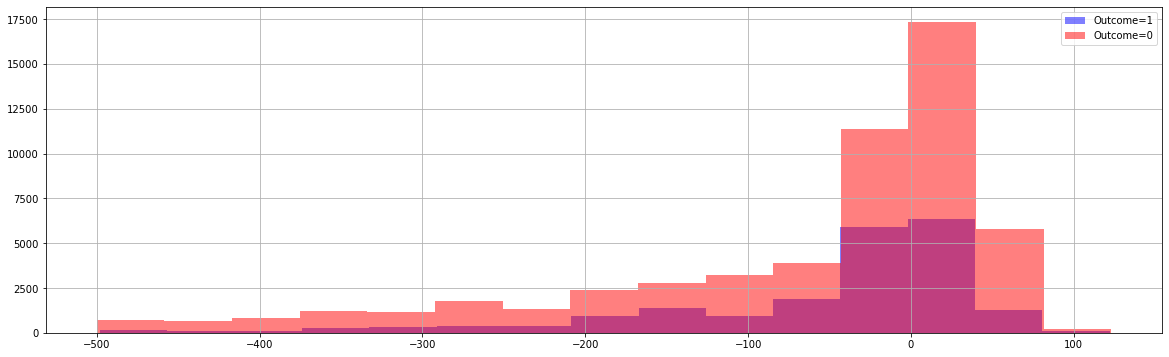

In [16]:
#regis_cs
plt.figure(figsize=(20,6))
train[train['overall_outcome']==1]['regis_cs'].hist(alpha=0.5,color='blue',
                                              bins=15,label='Outcome=1')
train[train['overall_outcome']==0]['regis_cs'].hist(alpha=0.5,color='red',
                                              bins=15,label='Outcome=0')
plt.legend()

In [ ]:
health_camp_detail=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/camp_info.csv')
patient_profile=pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/patient_dec22.csv')
fhc=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/First_Health_Camp_Attended.csv')
shc=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Second_Health_Camp_Attended.csv')
thc=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Third_Health_Camp_Attended.csv')
train=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Train.csv')
test=pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/test.csv')

In [ ]:
first_camp = pd.read_csv( data_path + "First_Health_Camp_Attended.csv" )
second_camp = pd.read_csv( data_path + "Second_Health_Camp_Attended.csv" )
third_camp = pd.read_csv( data_path + "Third_Health_Camp_Attended.csv" )
print first_camp.shape, second_camp.shape, third_camp.shape

col_names = [['Patient_ID','Health_Camp_ID','Outcome']]
first_camp = first_camp[['Patient_ID','Health_Camp_ID','Health_Score']]
first_camp.columns = col_names
second_camp = second_camp[['Patient_ID','Health_Camp_ID','Health Score']]
second_camp.columns = col_names
third_camp = third_camp[['Patient_ID','Health_Camp_ID','Number_of_stall_visited']]
third_camp = third_camp[third_camp['Number_of_stall_visited']>0]
third_camp.columns = col_names
print third_camp.shape

all_camps = pd.concat([first_camp, second_camp, third_camp])
all_camps['Outcome'] = 1
print all_camps.shape

train = pd.read_csv(data_path + "Train.csv")
print train.shape

train = train.merge(all_camps, on=['Patient_ID','Health_Camp_ID'], how='left')
train['Outcome'] = train['Outcome'].fillna(0).astype('int')
train.to_csv(data_path+'train_with_outcome.csv', index=False)
print train.Outcome.value_counts()